In [ ]:
# librosa 를 이용한 간단한 데이터 시각화
# https://www.dacon.io/competitions/official/235616/codeshare/1277

In [ ]:
! pip install seaborn
! pip install tqdm

In [60]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.io import wavfile
from glob import glob
from tqdm import tqdm

%matplotlib inline

sns.set_style('darkgrid')

In [61]:
def data_loader(files):
    out = []
    for file in tqdm(files):
        fs, data = wavfile.read(file)
        out.append(data)    
    out = np.array(out)
    return out

In [62]:
%%time

# 데이터 불러오기
# x_data = glob('./rsc/train/*.wav')
x_data = glob('C:/workspace/autoencoder/study/sound/baseline/*.wav')
x_data = data_loader(x_data)

100%|██████████| 11/11 [00:00<00:00, 788.34it/s]

CPU times: total: 15.6 ms
Wall time: 20 ms



C:\Users\astro\AppData\Local\Temp\ipykernel_20016\2627130267.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array(out)


In [63]:
%%time

# fs, data = wavfile.read('./rsc/train/train_00303.wav')
fs, data = wavfile.read('C:/workspace/autoencoder/study/sound/baseline/2118111119H001003823_TDM_2021-08-27_17-08-46__Microphone.wav')
data = np.array(data)

CPU times: total: 0 ns
Wall time: 2.99 ms


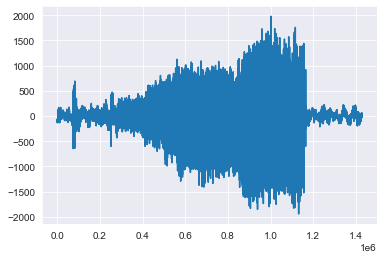

In [64]:
plt.plot(data)

In [65]:
import librosa.display, librosa

In [66]:
sig, sr = librosa.load('C:/workspace/autoencoder/study/sound/baseline/2118111119H001003823_TDM_2021-08-27_17-08-46__Microphone.wav')

C:\Users\astro\AppData\Local\Temp\ipykernel_20016\624160599.py:8: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sig, sr, alpha=0.5)


Text(0.5, 1.0, 'Waveform')

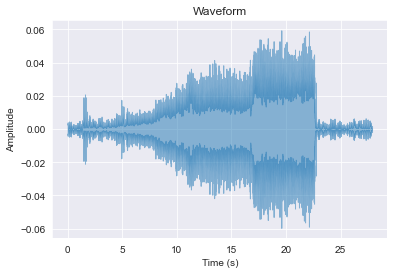

In [67]:
# plt.figure()
# librosa.display.waveplot(y, sr=22050, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000, ax=None, **kwargs)
# librosa.display.waveplot(sig, sr, alpha=0.5)

# librosa.display.AdaptiveWaveplot(times, y, steps, envelope, sr=22050, max_samples=11025)
# librosa.display.waveshow(y, *, sr=22050, max_points=11025, x_axis='time', offset=0.0, marker='', where='post', label=None, ax=None, **kwargs)
plt.figure()
librosa.display.waveshow(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Power spectrum')

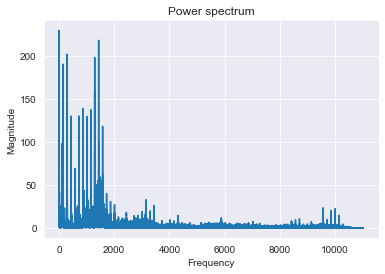

In [68]:
# Fourier -> Spectrum

fft = np.fft.fft(sig)

magnitude = np.abs(fft) 

f = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_f = f[:int(len(magnitude) / 2)]

plt.figure()
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

C:\Users\astro\AppData\Local\Temp\ipykernel_20016\1510332767.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(format="%+2.0f dB")


Text(0.5, 1.0, 'Spectrogram (dB)')

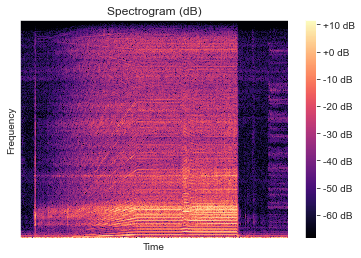

In [69]:
# STFT -> spectrogram

hop_length = 256
n_fft = 1024

hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

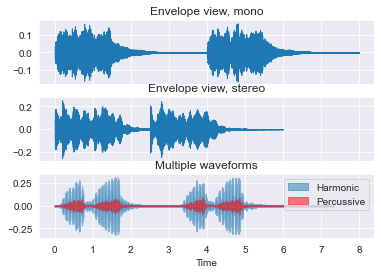

In [75]:
# y, sr = librosa.load('./rsc/train/train_00303.wav')
y, sr = librosa.load('C:/workspace/autoencoder/study/sound/LYNC_ringtone2.wav')
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y, sr = librosa.load('C:/workspace/autoencoder/study/sound/LYNC_ringtone4.wav')
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

y, sr = librosa.load('C:/workspace/autoencoder/study/sound/LYNC_ringtone7.wav')
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

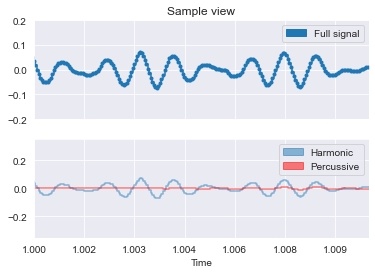

In [77]:
# Zooming in on a plot to show raw sample values
fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[1.0, 1.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()